## Importing the libraries

NumPy library provides the numerical operations, Pandas offers for data manipulation and analysis, Matplotlib allows for creating various visualizations, and Seaborn simplifies creating statistical plots.

In [15]:
#Importing multiple library to read,analysed and visualized the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [16]:
#loading the diabetes dataset
dataset = pd.read_csv("/content/diabetes.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Head() returns the first 5 rows of the Diabetes DataFrame.

In [17]:
#displaying the dataset
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
dataset.shape

(768, 9)

In [19]:
#Basic Information regarding data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset contains total 9 features in which 8 features(Pregnancies,Glucose,BloodPressure, SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age) are independent features and 1 feature(Outcome) is dependent or target variable.

In [20]:
 #finding the missing values
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 Generating a precise overview of the statistical properties of the numerical columns within the Diabetes Dataset. This method shows counts,mean,standered deviation, minimum,percentile and maxinum.

In [21]:
#Describe function gives the basic numerical info about data for each numeric feature..
print(dataset.describe(include='all'))

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [22]:
#Data points count value for each class labels..
dataset.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

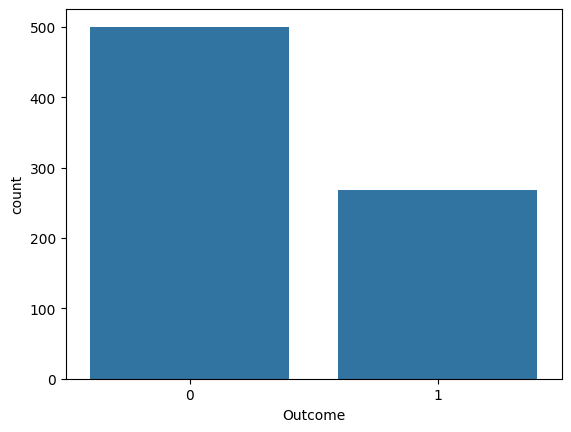

In [47]:
# Visualize the distribution of Outcome (target variable)
sns.countplot(x='Outcome', data=dataset)
plt.show()

The countplot representing the number of patients in the outcome category. Helpsto visualize the distribution of diabetic and non-diabetic patients within the dataset.

## Splitting the dataset into the Training set and Test set

After pre-processing the dataset there is the need to split the data into ratio of 75:25 for training and testing respectively.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [25]:
print(X_train)

[[  9.     89.     62.    ...  22.5     0.142  33.   ]
 [  1.    118.     58.    ...  33.3     0.261  23.   ]
 [  0.     91.     80.    ...  32.4     0.601  27.   ]
 ...
 [  4.     94.     65.    ...  24.7     0.148  21.   ]
 [ 11.     85.     74.    ...  30.1     0.3    35.   ]
 [  5.    136.     82.    ...   0.      0.64   69.   ]]


In [26]:
print(y_train)

[0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0
 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0
 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1
 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0
 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1
 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0
 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1
 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 0
 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1
 1 0 1 1 0 0 1 0 0 0 1 0 

In [27]:
print(X_test)

[[  1.    199.     76.    ...  42.9     1.394  22.   ]
 [  2.    107.     74.    ...  33.6     0.404  23.   ]
 [  4.     76.     62.    ...  34.      0.391  25.   ]
 ...
 [  1.    109.     60.    ...  25.4     0.947  21.   ]
 [  3.    128.     78.    ...  21.1     0.268  55.   ]
 [  5.     88.     78.    ...  27.6     0.258  37.   ]]


In [28]:
print(y_test)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0]


## Feature Scaling

We standardizes the features in training and testing data using the StandardScaler object. This will help to improve the performance of the machine learning algorithms

In [29]:
# Standstarding the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the  model on the Training set

The kernel'rbf' (Radial Basis Function) function to be used for the SVM. Which is a popular kernel function for non-linear SVM classification.
random_state = 0: This sets a seed for the random number generator used by the SVM algorithm.

In [30]:
from sklearn.svm import SVC
SVM= SVC(kernel = 'rbf', random_state = 0)
SVM.fit(X_train, y_train)

SVC(random_state=0)

This LogisticRegression class and assigns it to the variable LR.
It also sets the random_state hyperparameter to 0

In [31]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0)
LR.fit(X_train,y_train)

LogisticRegression(random_state=0)

This a Decision Tree Classifier and it assigns to the variable DC.  'entropy' is chosen, which is a common measure used in decision trees to select the feature that best splits the data.

In [32]:
from sklearn.tree import DecisionTreeClassifier
DC= DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DC.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

We assigned this classifier to 3 neighbors, and then trains the model using the provided training data (X_train) and its corresponding target labels (y_train).

In [33]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Predicting the Test set results

We create separate predictions for each data point in the testing data using the four different machine learning models. They are stored sas y_pred_SVM, y_pred_LR, y_pred_DC, and y_pred_KNN

In [34]:
y_pred_SVM = SVM.predict(X_test)
y_pred_LR = LR.predict(X_test)
y_pred_DC = DC.predict(X_test)
y_pred_KNN = KNN.predict(X_test)


## Performance Evaluation

Calculates metrics to evaluate the performance of the all model on the testing data:


* Confusion matrix: Provides a visual overview of correct and incorrect predictions.   
* Sensitivity: Measures the model's ability to identify true positives.
*  Specificity: Measures the model's ability to identify true negatives.







In [35]:
#imports the matrix needed for evaluating the performance of classification
from sklearn.metrics import recall_score,confusion_matrix

# **Support Vector Machine**

In [36]:
conf_matrix_1= confusion_matrix(y_test, y_pred_SVM)
sensitivity_1 = recall_score(y_test, y_pred_SVM)
specificity_1 = recall_score(np.logical_not(y_test), np.logical_not(y_pred_SVM))

#Performance Evaluation for Support Vector Machine

print("Confusion_matrix for Support Vector Machine:", conf_matrix_1)
print("sensitivity for Support Vector Machine:", sensitivity_1)
print("specificity for Support Vector Machine:,", specificity_1)

Confusion_matrix for Support Vector Machine: [[117  13]
 [ 30  32]]
sensitivity for Support Vector Machine: 0.5161290322580645
specificity for Support Vector Machine:, 0.9


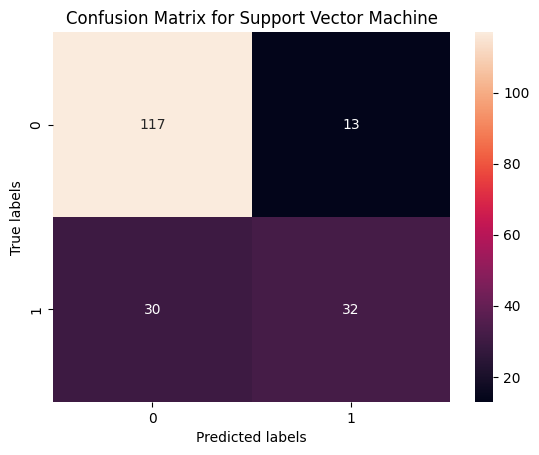

In [37]:
#For Visualizing the dataset we used Matplotlib and seaborn as a python library
# Confusion matrix SV
sns.heatmap(conf_matrix_1, annot=True, fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title('Confusion Matrix for Support Vector Machine')
plt.show()

Out of 192 people sample tested the Support Vector Machine (SVM) show that, 117 of them were correctly told that they had the disease; 13 people were told they had the disease when they didn’t; 32 people correctly received a negative result; and a further 30 people get a negative result when they do have the disease.

# **LogisticRegression**

In [38]:
#LogisticRegression Performance Evaluation

conf_matrix_2= confusion_matrix(y_test, y_pred_LR)
sensitivity_2 = recall_score(y_test, y_pred_LR)
specificity_2 = recall_score(np.logical_not(y_test), np.logical_not(y_pred_LR))

print("Confusion_matrix for LogisticRegression:",conf_matrix_2)
print("sensitivity for LogisticRegression:", sensitivity_2)
print("specificity for LogisticRegression:,", specificity_2)

Confusion_matrix for LogisticRegression: [[118  12]
 [ 26  36]]
sensitivity for LogisticRegression: 0.5806451612903226
specificity for LogisticRegression:, 0.9076923076923077


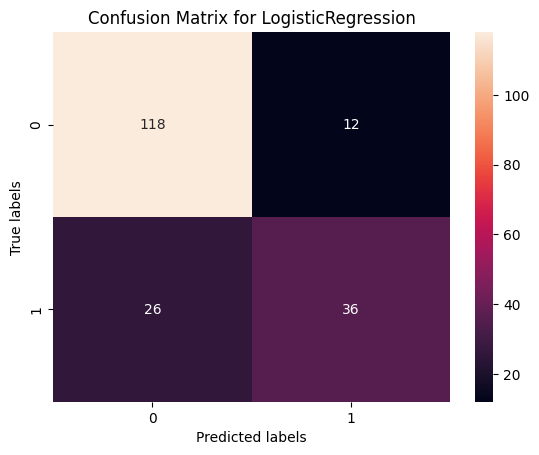

In [39]:
#For Visualizing the dataset we used Matplotlib and seaborn as a python library
# Confusion matrix LR
sns.heatmap(conf_matrix_2, annot=True, fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

This means that, out of 192 people sample tested, 188 of them are correctly told that they have the disease; 12 people are told they have the disease when really they don’t; 36 people correctly receive a negative result; and a further 26 people get a negative result when they do in fact have the disease.

# **DecisionTreeClassifie**

In [40]:
#DecisionTreeClassifie Performance Evaluation

conf_matrix_3= confusion_matrix(y_test, y_pred_DC)
sensitivity_3 = recall_score(y_test, y_pred_DC)
specificity_3 = recall_score(np.logical_not(y_test), np.logical_not(y_pred_DC))

print("Confusion_matrix for DecisionTreeClassifier:",conf_matrix_3)
print("sensitivity for DecisionTreeClassifie:", sensitivity_3)
print("specificity for DecisionTreeClassifie:,", specificity_3)

Confusion_matrix for DecisionTreeClassifier: [[105  25]
 [ 18  44]]
sensitivity for DecisionTreeClassifie: 0.7096774193548387
specificity for DecisionTreeClassifie:, 0.8076923076923077


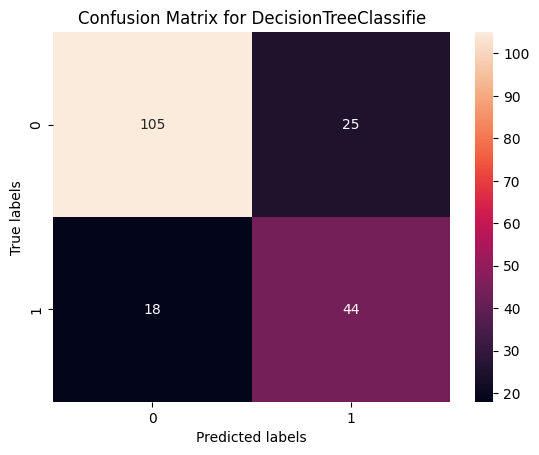

In [41]:
#For Visualizing the dataset we used Matplotlib and seaborn as a python library
# Confusion matrix DC
sns.heatmap(conf_matrix_3, annot=True, fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title('Confusion Matrix for DecisionTreeClassifie')
plt.show()

Also, this DecisionTreeClassifier identifying people with diabetes on this confusion matrix shows (high True Positives) but there were also a significant number of False Negatives.
Out of 192 people, 105 of them are correctly told that they have the disease; 25 people are told they have the disease when they don’t; 44 people correctly receive a negative result; and a further 18 people get a negative result when they do have the disease.

# **KNeighborsClassifier**

In [42]:
#KNeighborsClassifier Performance Evaluation

conf_matrix_4= confusion_matrix(y_test, y_pred_KNN)
sensitivity_4 = recall_score(y_test, y_pred_KNN)
specificity_4 = recall_score(np.logical_not(y_test), np.logical_not(y_pred_KNN))


print("Confusion_matrix for KNeighborsClassifier:",conf_matrix_4)
print("sensitivity for KNeighborsClassifier:", sensitivity_4)
print("specificity for KNeighborsClassifier:,", specificity_4)

Confusion_matrix for KNeighborsClassifier: [[108  22]
 [ 30  32]]
sensitivity for KNeighborsClassifier: 0.5161290322580645
specificity for KNeighborsClassifier:, 0.8307692307692308


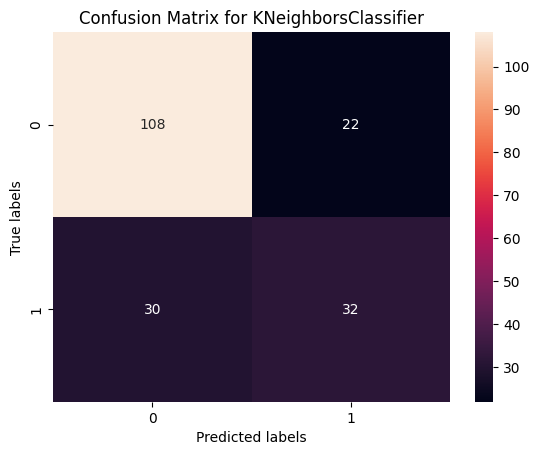

In [43]:
#For Visualizing the dataset we used Matplotlib and seaborn as a python library
# Confusion matrix KN
sns.heatmap(conf_matrix_4, annot=True, fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title('Confusion Matrix for KNeighborsClassifier')
plt.show()

Overall, the confusion matrix for the KNN classifier in this case performed well in identifying people with diabetes (high True Positives) and there were also a number of False Negatives.
This means that, out of 192 people, 108 of them are correctly told that they have the disease; 22 people are told they have the disease when really they don’t; 32 people correctly receive a negative result; and a further 30 people get a negative result when they do in fact have the disease.

We create sensitivity and specificity scores for the different machine learning algorithms applied to the dataset. This DataFrame will be useful for comparing the performance of these algorithms and making informed decisions about model selection.

In [44]:
data = {'Algorithm': ['SVM', 'LR', 'DC','KNN'],
        'Sensitivity': [0.52, 0.58, 0.71, 0.52],
        'Specificity': [0.9, 0.91, 0.81, 0.83]}
dan= pd.DataFrame(data)


# Line chart

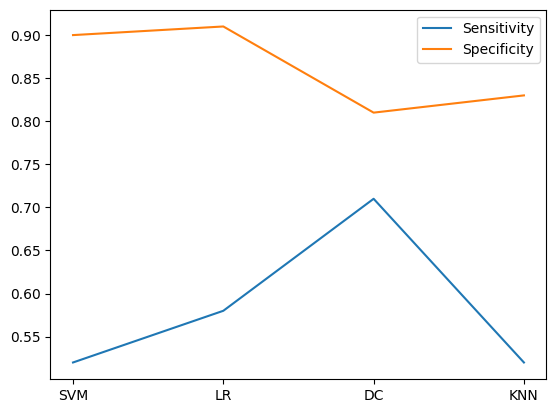

In [45]:
plt.plot(dan['Algorithm'], dan['Sensitivity'], label='Sensitivity')
plt.plot(dan['Algorithm'], dan['Specificity'], label='Specificity')
plt.legend()
plt.show()


The line graph shows the sensitivity and specificity of four of the algorithms.

# Bar chart
visualizing relationships between sensitivity and specificity.

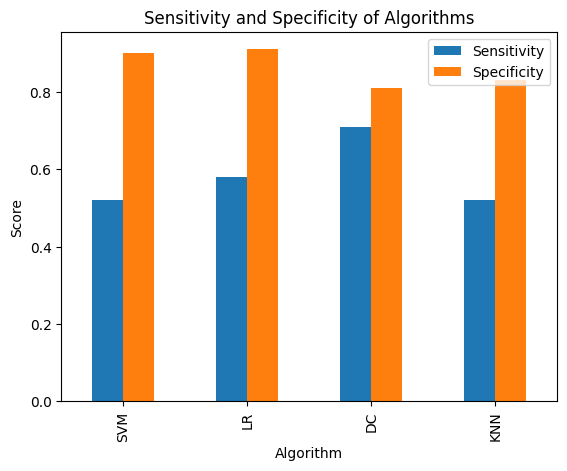

In [46]:
# Create bar chart with grouped bars
fig, ax = plt.subplots()
dan.plot(kind='bar', x='Algorithm', y=['Sensitivity', 'Specificity'], ax=ax)
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.title('Sensitivity and Specificity of Algorithms')
plt.show()

The graph shows that DC has the highest sensitivity, followed by LR, DC, SVM and KNN. This means DC is the best at catching people with diabetes out of the four algorithms. While, for specificity, LR seems to be the best, followed by SVM, KNN and DC.